In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
pgf_with_rc_fonts = {
    "text.usetex": True,
    "text.latex.unicode": True,
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
    "pgf.preamble": [
        r'\usepackage{amsmath}',
        r'\usepackage{gensymb}',
        r'\usepackage{siunitx}',
        r'\DeclareSIUnit{\revolution}{rev}',
    ]
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt

import pandas as pd
import os

# Background Color
bg = '#d3e9f8'
import ingest
import numpy as np
df = ingest.setup('../../valid/capture/capture2')

Dropped 11 outlier coordinates
Dropped 2 outlier coordinates


In [4]:
import warnings
import error_by_width
warnings.filterwarnings('ignore')
widths = [(-i,i) for i in range(1,181)]
errors = error_by_width.error(widths, df)


HBox(children=(IntProgress(value=0, description='Preparing data', max=580), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Interpolating', max=104400), HTML(value='')))

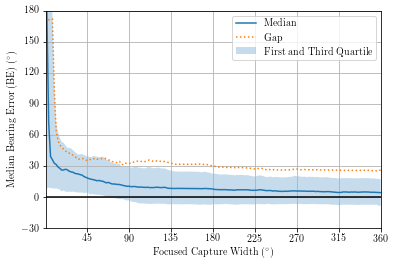

In [12]:
# Print the median results by method
#errors_display = errors.groupby('width')['error'].apply(lambda x: pd.Series.median(pd.Series.abs(x)))
err = errors.groupby('width')['error']
abs_median = err.apply(lambda x: pd.Series.median(pd.Series.abs(x)))
idx = (np.arange(2,362,2)[::-1])
err_lq = err.quantile(0.25)
err_uq = err.quantile(0.75)
err_med = err.quantile(0.50)
err_min = err.quantile(0)
err_max = err.quantile(1)
err_gap = err_uq - err_lq

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(idx, err_med.values, label="Median")
#ax.plot(idx, abs_median.values, label="Median (Abs)", linestyle='--')
ax.plot(idx, err_gap.values, label="Gap", linestyle=':')
ax.fill_between(idx, err_lq.values, err_uq.values, antialiased=True, alpha=0.25, linestyle='-', label="First and Third Quartile")
ax.set_ylabel("Median Bearing Error (BE)  ($^\circ$)")
ax.set_xlabel("Focused Capture Width ($^\circ$)")
ax.set_xticks([x for x in range(0,361,45)])
ax.set_yticks([y for y in range(-30,181,30)])
ax.set_xlim([1,360])
ax.set_ylim([-30,180])
ax.grid()
ax.legend(bbox_to_anchor=(1,1))
ax.plot([0,360],[0,0],'k')
plt.savefig('focused_capture_width.pgf')

In [16]:
err_lq = err.quantile(0.25)
err_uq = err.quantile(0.75)
err_gap = err_uq - err_lq
err_gap.index = idx
err_gap[np.arange(80,100,2)]

80    34.323284
82    31.494270
84    31.145738
86    32.644974
88    32.411876
90    32.617166
92    32.444514
94    33.150923
96    34.156494
98    34.625586
Name: error, dtype: float64

count    580.000000
mean      15.082287
std       56.440032
min     -178.218018
25%       -3.359070
50%       10.218872
75%       29.052806
max      180.000000
Name: error, dtype: float64

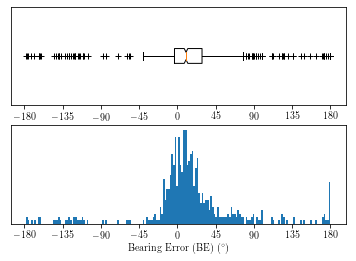

In [21]:
fcw = errors[errors.width==(-44,44)].error

f, (ax1, ax2) = plt.subplots(2, sharex=False)
ax1.boxplot(fcw, 1, vert=False, sym='+')

# label = f"Optimal CHD (median: {format(data['discovery-hop-dist-2'].median(), '.2f')} "
plt.rcParams["figure.figsize"] = [6, 4]
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(axis='y', which=u'both',length=0)
ax2.tick_params(axis='y', which=u'both',length=0)
ax1.set_xticks([x for x in range(-180,181,45)])
ax2.set_xticks([x for x in range(-180,181,45)])

plt.xlabel(r'Bearing Error (BE)  ($^\circ$)')


ax2.hist(fcw, 180)
f.savefig('fcw_optimal.pgf')

fcw.describe()